# Problem Statement:

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

You can find the dataset at:https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

In [1]:
#Importing some basic libraries
import os
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir(r"Downloads")

In [4]:
df=pd.read_csv('cubic_zirconia.csv')

In [5]:
df.shape

(26967, 11)

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
#Dropping the first column
df=df.iloc[:, 1:]

In [8]:
df.shape

(26967, 10)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
#checking columns, datatypes, total records, and number of Non_null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [12]:
# Imputing depth missing values with its median
df = df.fillna(df.median())

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
#Getting only data type of varibles
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [15]:
# Making a copy of df
df_original=df[:]

In [16]:
#Getting the number of duplicated observations
df.duplicated().sum()

34

In [17]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [18]:
#Removing all observation that don't have at least 1 non-missing value
df.dropna(thresh=1,inplace=True) 

In [19]:
df.shape

(26933, 10)

In [20]:
df_original.shape[0]-df.shape[0]

34

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [22]:
# Finding outliers
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)# UIF is upper inner fence
    LIF=Q1-1.5*(IQR)# LIF is lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # A new data set that contains only  potential outliers
    sns.distplot(df_out[col])
   
    return df_out[col] .describe()

# Univariate Analysis

# The statistical summary of the dataset

In [23]:
#data descrition
df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


In [24]:
df.astype('object').describe().transpose()

,count,unique,top,freq
carat,26933.0,257.0,0.3,1328.0
cut,26933,5,Ideal,10805
color,26933,7,G,5653
clarity,26933,8,SI1,6565
depth,26933.0,169.0,61.8,1709.0
table,26933.0,112.0,56.0,4983.0
x,26933.0,531.0,4.38,233.0
y,26933.0,526.0,4.35,236.0
z,26933.0,356.0,2.69,393.0
price,26933,8742,544,74


In [25]:
#Find the Frequency of each items(levels)
#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.apply(lambda x:print( x.value_counts()))

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


cut        None
color      None
clarity    None
dtype: object

# Target: Price

In [26]:
df['price'].describe()

count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64

<AxesSubplot:>

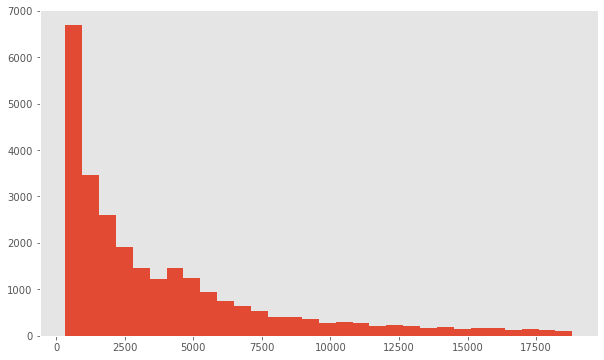

In [27]:
df['price'].hist(grid=False,
       figsize=(10, 6),
       bins=30)


<AxesSubplot:xlabel='price'>

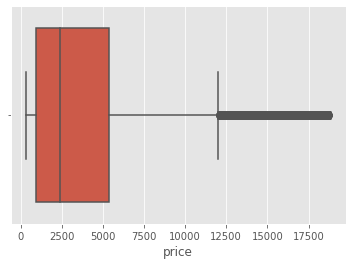

In [28]:
sns.boxplot(df.price)

count     1778.000000
mean     15027.742970
std       1962.816586
min      11975.000000
25%      13250.750000
50%      14874.500000
75%      16703.750000
max      18818.000000
Name: price, dtype: float64

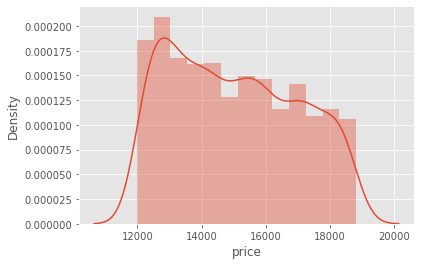

In [29]:
#Price outliers
outlier_analysis('price')

# Carat

In [30]:
df['carat'].describe()

count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64

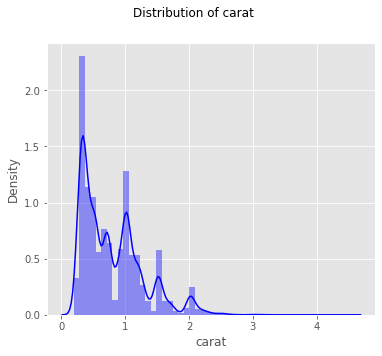

In [31]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(132)
sns.distplot(df['carat'], color='blue')
plt.suptitle('Distribution of carat')
plt.show()

<AxesSubplot:xlabel='carat'>

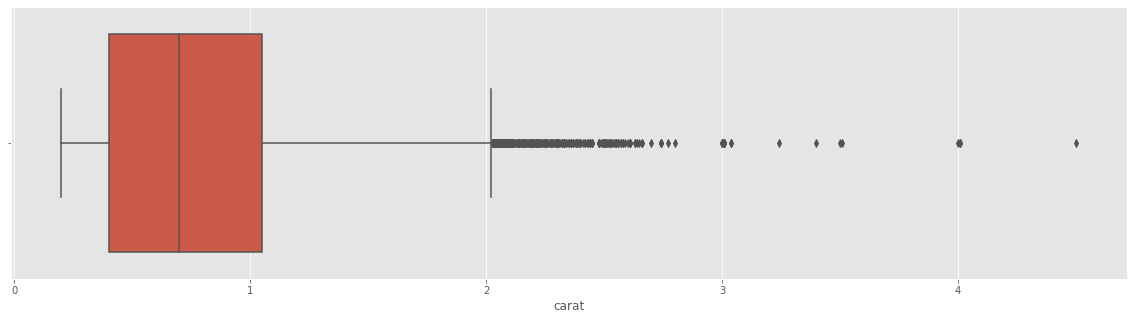

In [32]:
sns.boxplot(df.carat)

count    657.000000
mean       2.218189
std        0.263901
min        2.030000
25%        2.060000
50%        2.140000
75%        2.280000
max        4.500000
Name: carat, dtype: float64

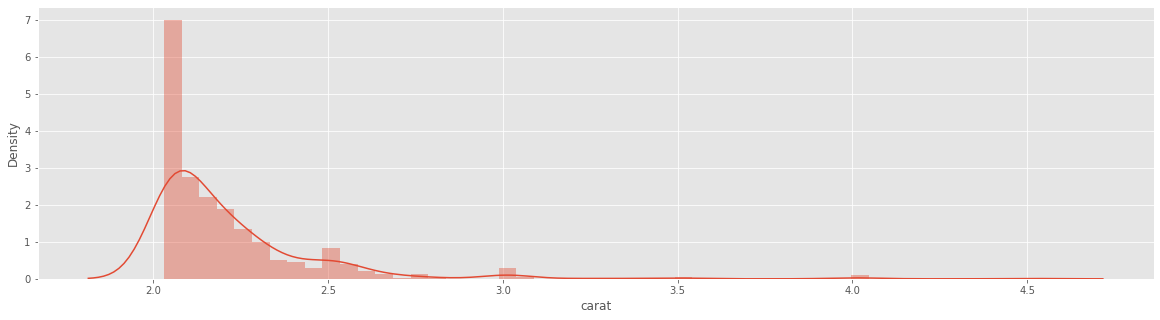

In [33]:
#Carat outliers
outlier_analysis('carat')

# Cut

In [34]:
df['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

([<matplotlib.patches.Wedge at 0x1b4593595e0>,
 [Text(-1.095025647098324, 0.3513101652342228, 'Ideal'),
  Text(0.20850352181477555, -1.130940441133323, 'Premium'),
  Text(1.142036414301068, 0.13510302887189451, 'Very Good'),
  Text(0.5167095142293274, 1.0273807852519399, 'Good'),
  Text(0.11811472570066442, 1.294623077027695, 'Fair')],
 [Text(-0.61892753966427, 0.19856661513238677, '40.12%'),
  Text(0.1178498166779166, -0.6392272058579652, '25.57%'),
  Text(0.6454988428658209, 0.07636258153628821, '22.38%'),
  Text(0.2920532036948372, 0.5806934873163138, '9.04%'),
  Text(0.07268598504656272, 0.7966911243247353, '2.90%')])

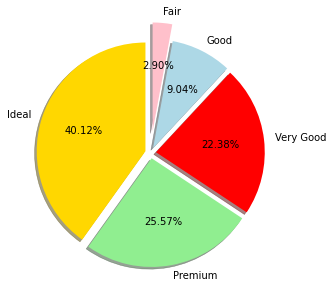

In [35]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

Text(0.5, 1, 'Cut Counts')

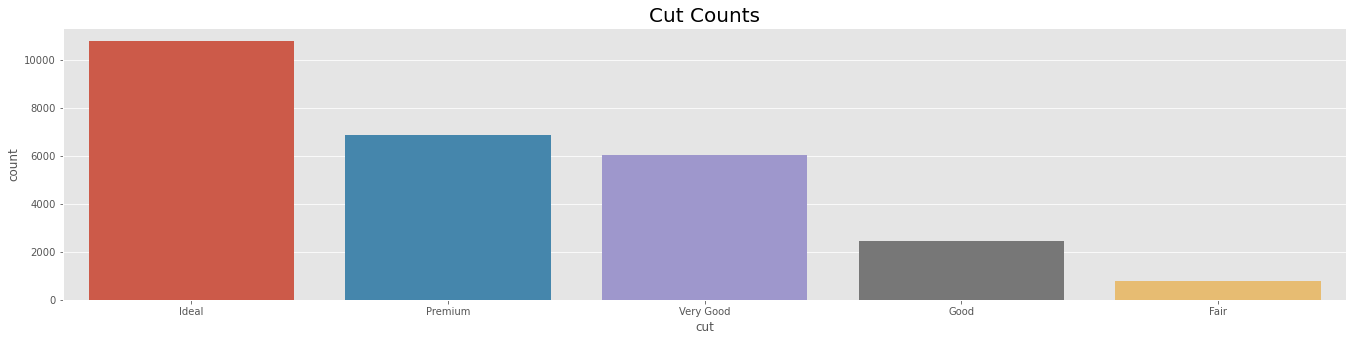

In [36]:
sns.countplot(df['cut'])
plt.title("Cut Counts", y=1, fontdict={"fontsize": 20})

# Color

In [37]:
df['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

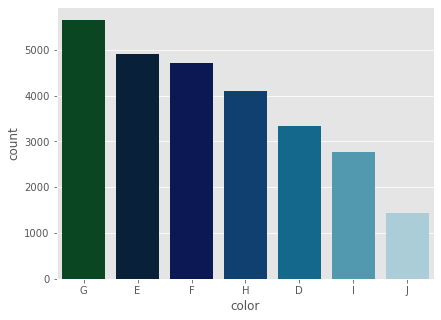

In [38]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

# Clarity

In [39]:
df['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

Text(0, 0.5, 'count')

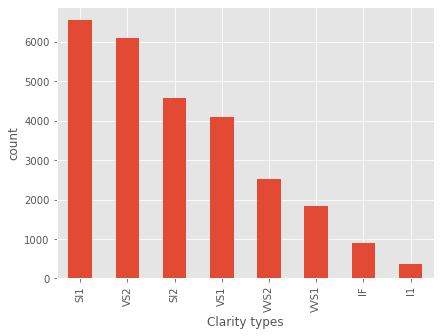

In [40]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('Clarity types')
plt.ylabel('count')

# Depth

In [41]:
df['depth'].describe()

count    26933.000000
mean        61.746701
std          1.393875
min         50.800000
25%         61.100000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

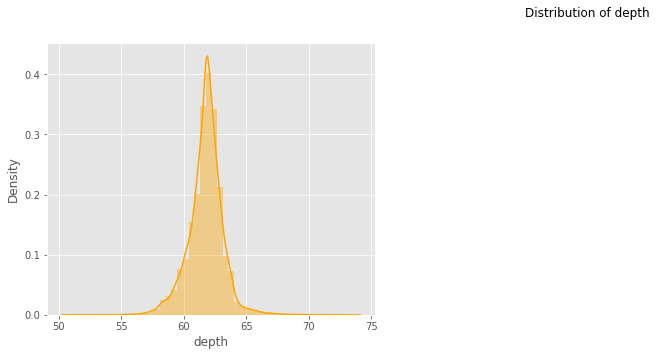

In [42]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')
plt.suptitle('Distribution of depth')
plt.show()

<AxesSubplot:xlabel='depth'>

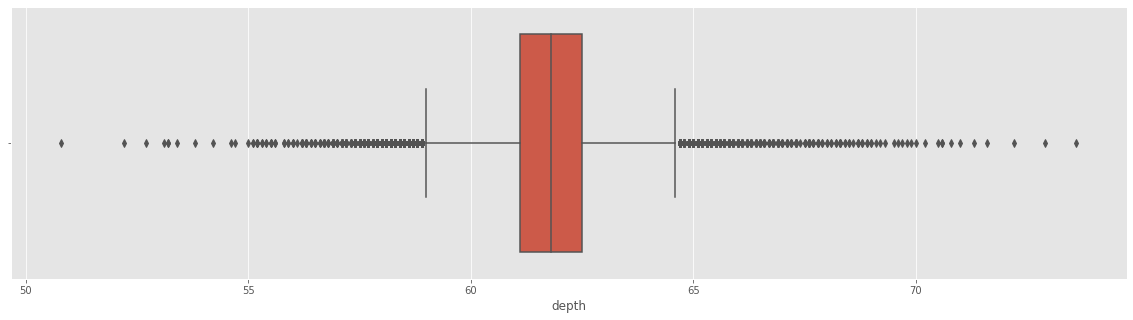

In [43]:
sns.boxplot(df.depth)

count    1413.000000
mean       60.973319
std         3.988255
min        50.800000
25%        58.200000
50%        58.700000
75%        65.200000
max        73.600000
Name: depth, dtype: float64

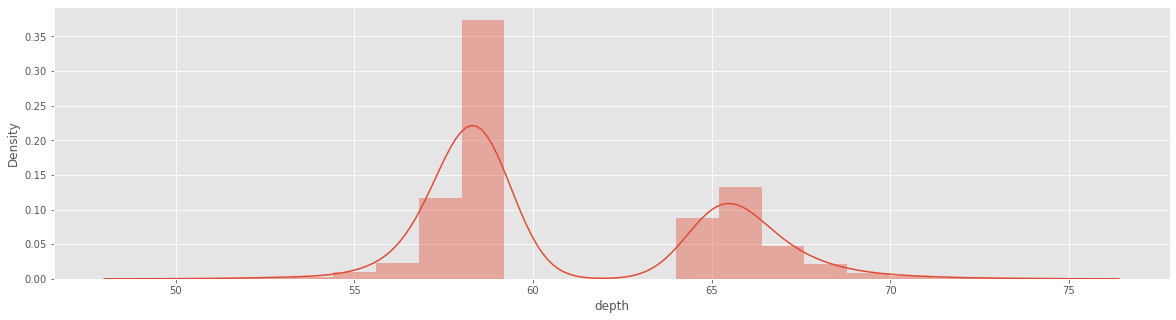

In [44]:
#Depth outliers
outlier_analysis('depth')

# Table

In [45]:
df['table'].describe()

count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

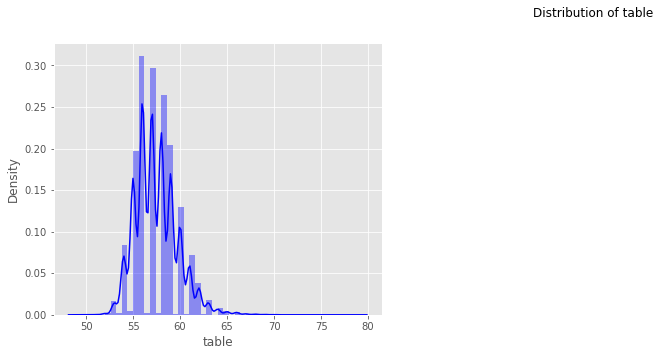

In [46]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['table'], color='blue')
plt.suptitle('Distribution of table')
plt.show()

<AxesSubplot:xlabel='table'>

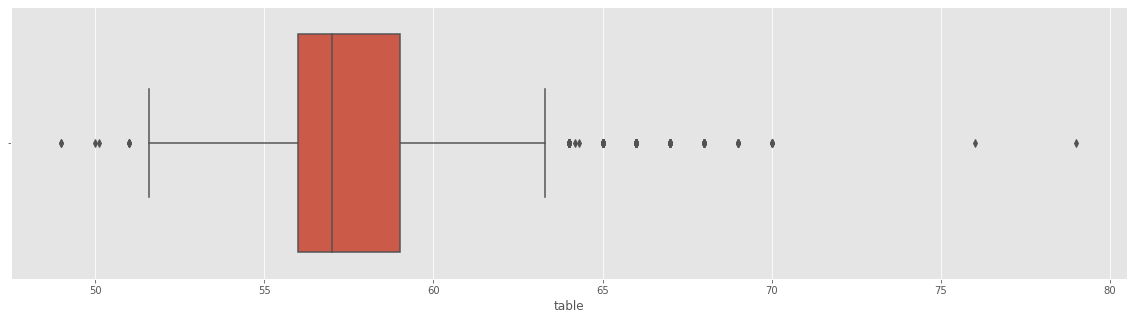

In [47]:
sns.boxplot(df.table)

count    318.000000
mean      64.926415
std        2.929464
min       49.000000
25%       64.000000
50%       65.000000
75%       66.000000
max       79.000000
Name: table, dtype: float64

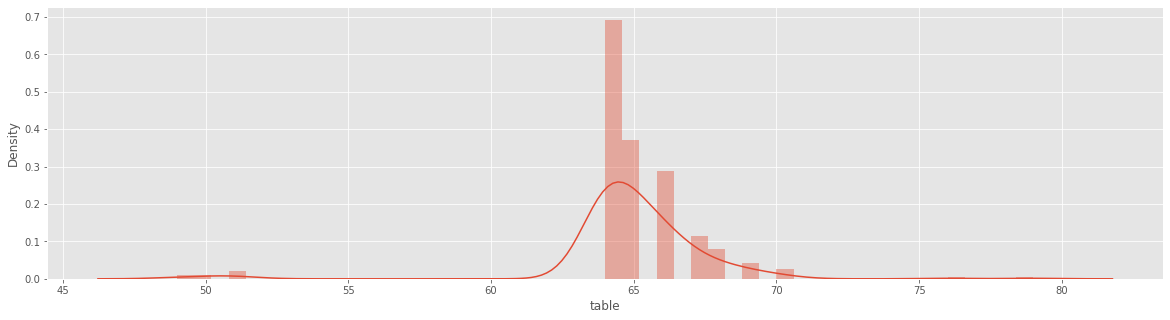

In [48]:
#Depth outliers
outlier_analysis('table')

# X

In [49]:
df['x'].describe()

count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64

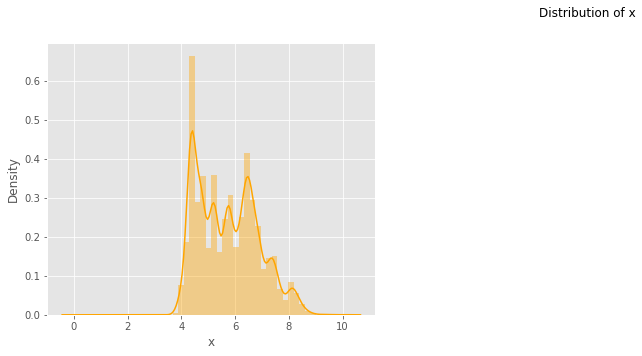

In [50]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['x'], color='orange')
plt.suptitle('Distribution of x')
plt.show()

<AxesSubplot:xlabel='x'>

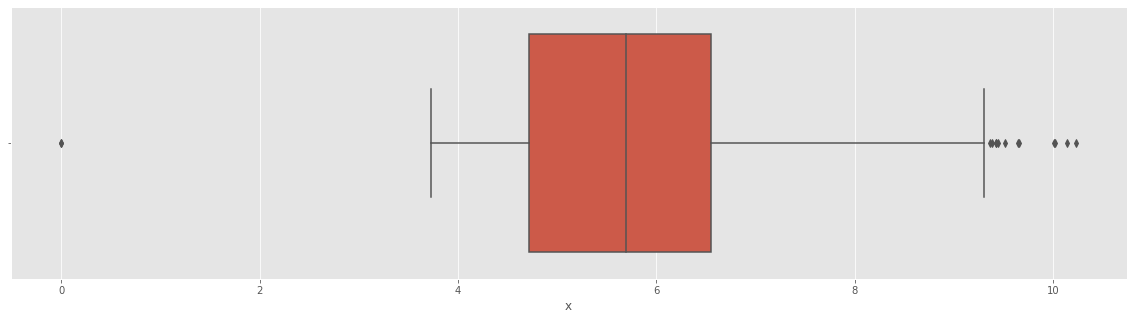

In [51]:
sns.boxplot(df.x)

count    14.000000
mean      8.302857
std       3.530172
min       0.000000
25%       9.390000
50%       9.475000
75%       9.922500
max      10.230000
Name: x, dtype: float64

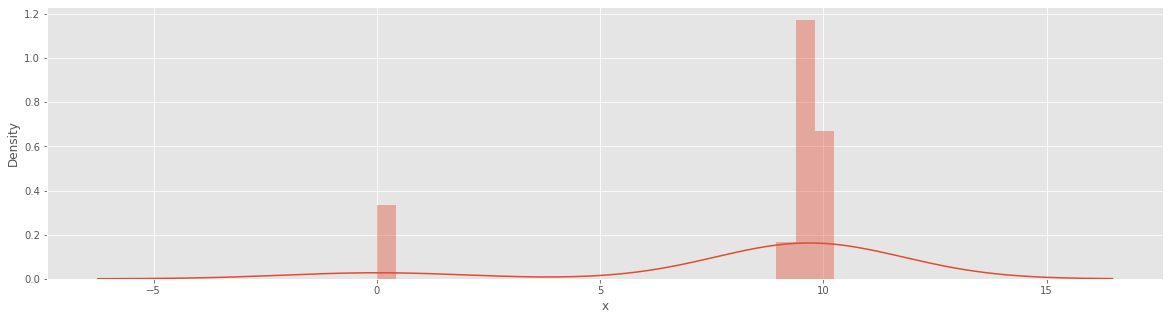

In [52]:
outlier_analysis('x')

# Y

In [53]:
df['y'].describe()

count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64

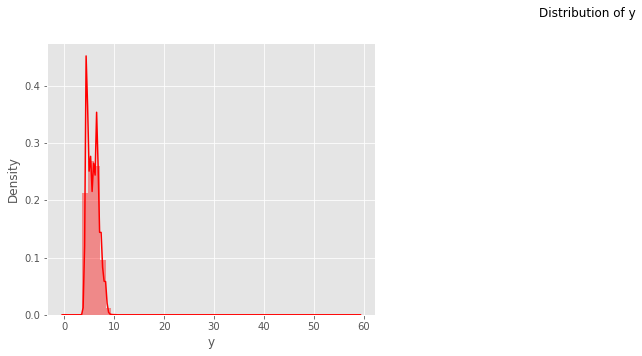

In [54]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['y'], color='red')
plt.suptitle('Distribution of y')
plt.show()

<AxesSubplot:xlabel='y'>

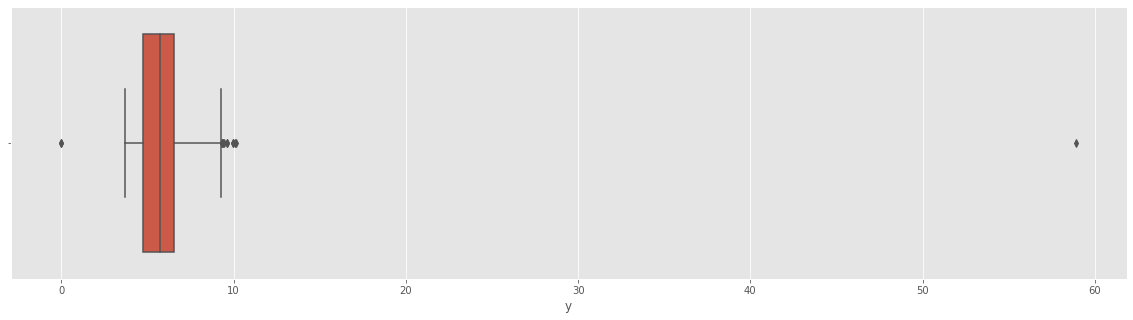

In [55]:
sns.boxplot(df.y)

count    14.000000
mean     11.791429
std      14.001836
min       0.000000
25%       9.317500
50%       9.525000
75%       9.940000
max      58.900000
Name: y, dtype: float64

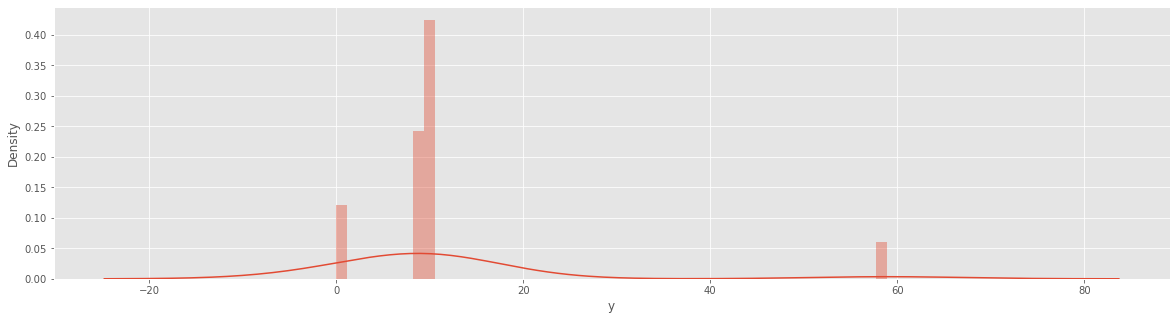

In [56]:
outlier_analysis('y')

# Z

In [57]:
df['z'].describe()

count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

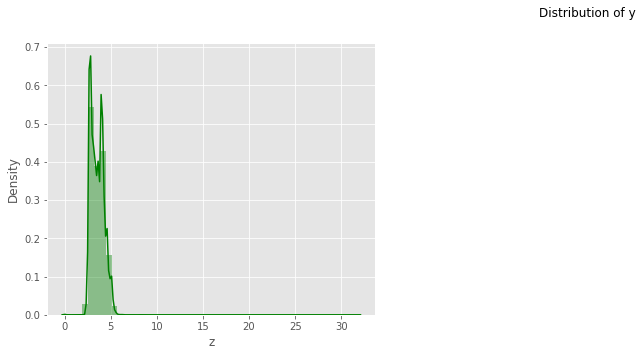

In [58]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['z'], color='green')
plt.suptitle('Distribution of y')
plt.show()

<AxesSubplot:xlabel='z'>

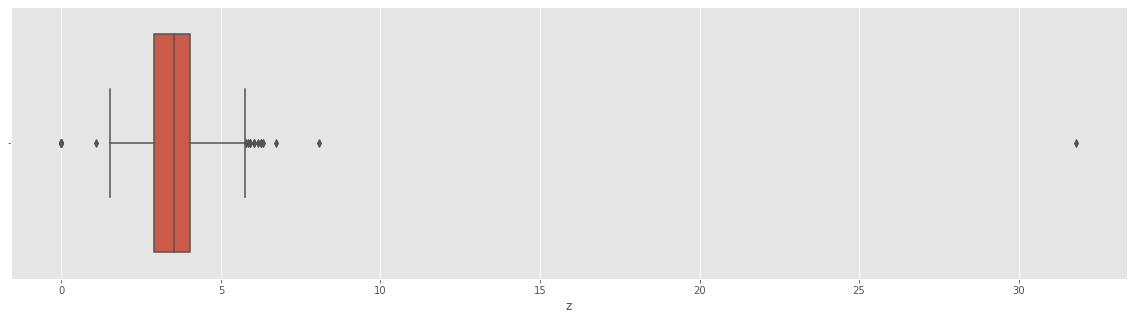

In [59]:
sns.boxplot(df.z)

count    22.000000
mean      4.914545
std       6.751151
min       0.000000
25%       0.000000
50%       5.875000
75%       6.222500
max      31.800000
Name: z, dtype: float64

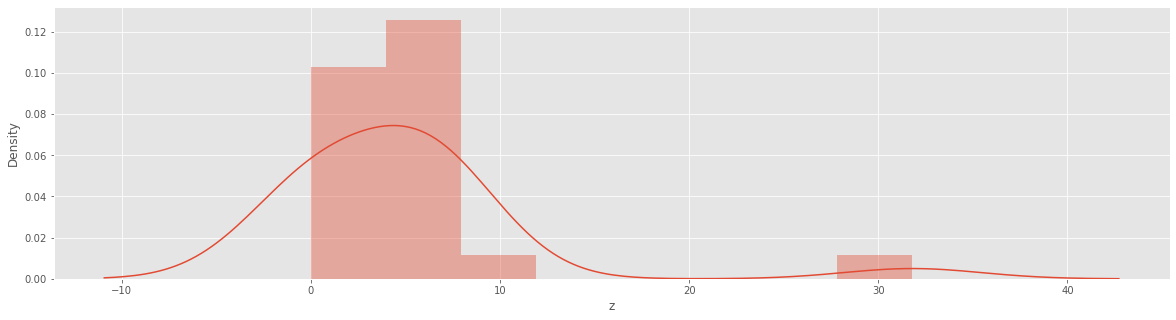

In [60]:
outlier_analysis('z')

In [61]:
# Replacing values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)#UOF=upper outer fence
    LOF=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF:   
            Clean_col.append(LOF)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print('Number of outliers that they are less than lower outer fence: ',i,'\nNumber of outliers that they are bigger than upper outer fence: ',j)
    return df[col] .describe()

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  17


count    26933.000000
mean         0.797776
std          0.475918
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          3.000000
Name: carat, dtype: float64

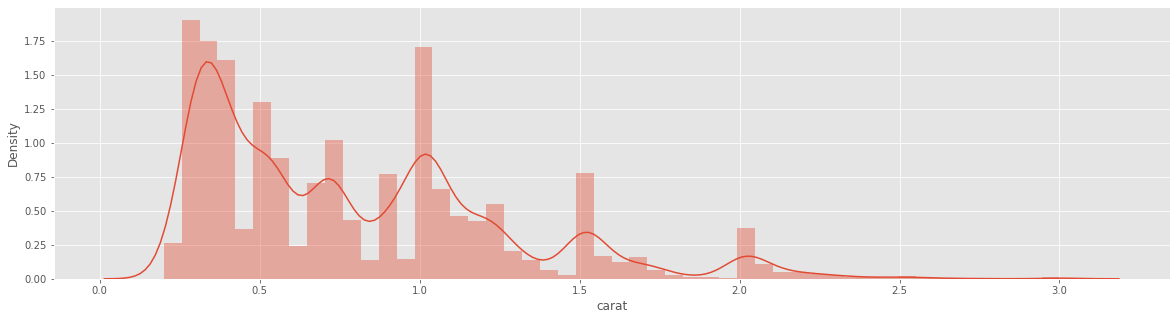

In [62]:
fixing_outliers('carat')

Number of outliers that they are less than lower outer fence:  83 
Number of outliers that they are bigger than upper outer fence:  118


count    26933.000000
mean        61.744057
std          1.352597
min         56.900000
25%         61.100000
50%         61.800000
75%         62.500000
max         66.700000
Name: depth, dtype: float64

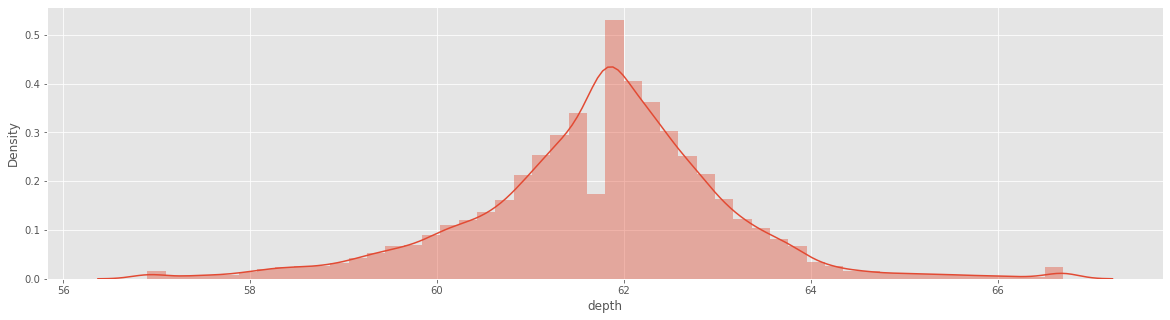

In [63]:
fixing_outliers('depth')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  15


count    26933.000000
mean        57.454576
std          2.223880
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         68.000000
Name: table, dtype: float64

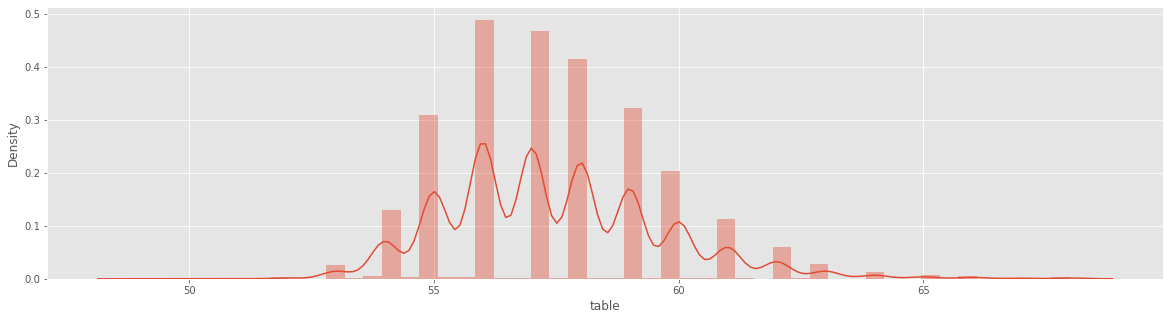

In [64]:
fixing_outliers('table')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  0


count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64

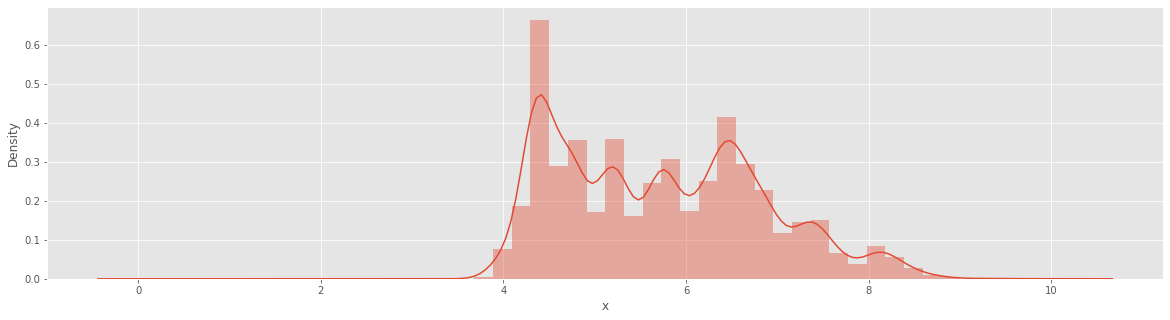

In [65]:
fixing_outliers('x')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  1


count    26933.000000
mean         5.731362
std          1.119743
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         12.030000
Name: y, dtype: float64

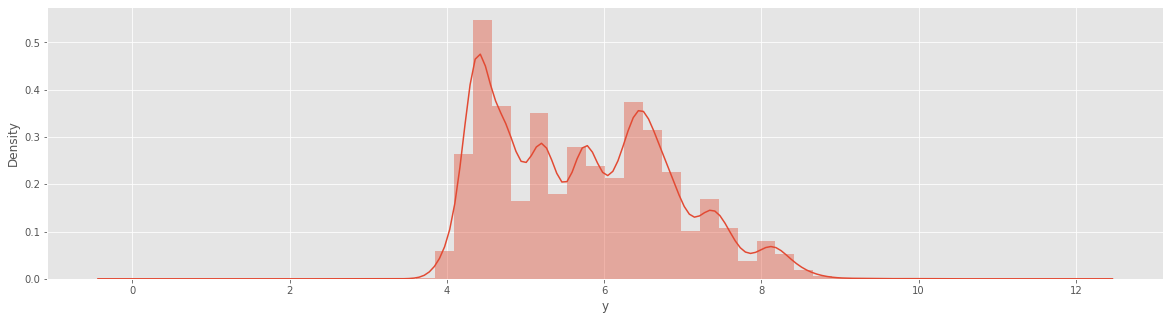

In [66]:
fixing_outliers('y')

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  2


count    26933.000000
mean         3.536843
std          0.699337
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max          7.460000
Name: z, dtype: float64

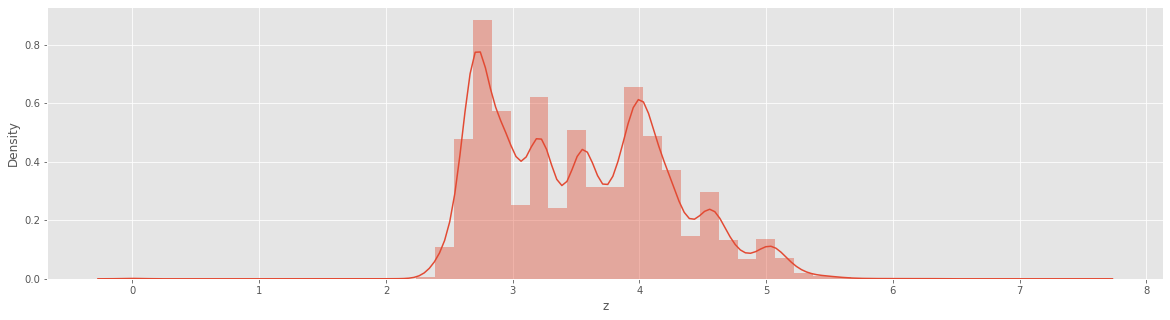

In [67]:
fixing_outliers('z')

In [68]:
df.shape

(26933, 10)

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# Some bivariate analysis

In [70]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is statistiacally significant correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

# Cut vs. price

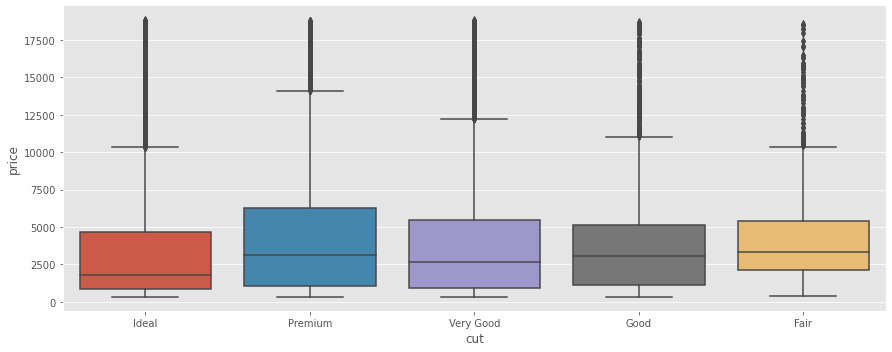

In [71]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

# Color vs. price

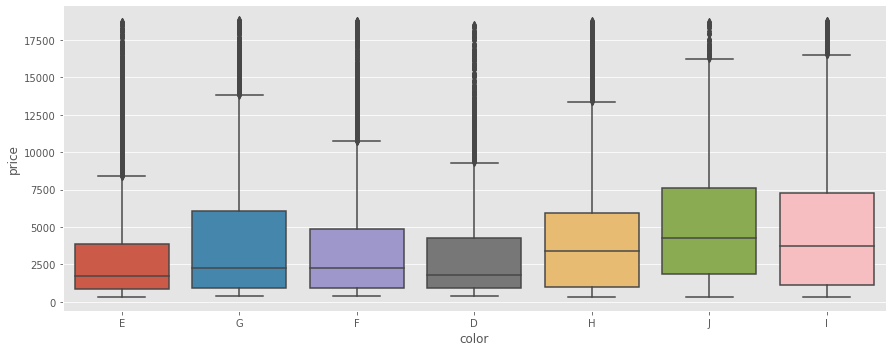

In [72]:
sns.catplot(x='color', y='price', kind='box', data=df, aspect=2.5)

# Clarity vs. price

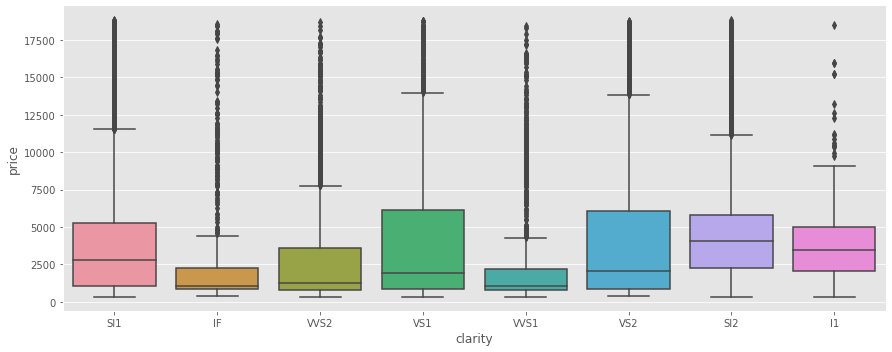

In [73]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

In [74]:
#ANOVA test for cut vs price
# 1)Checking outliers: We already have handled outliers.

In [75]:

#2)Checking normality
Ideal=df[df['cut']=='Ideal']['price']
Premium=df[df['cut']=='Premium']['price']
Very_good=df[df['cut']=='Very Good']['price']
Good=df[df['cut']=='Good']['price']
Fair=df[df['cut']=='Fair']['price']

In [76]:
import scipy.stats as stats

In [77]:
stats.shapiro(Ideal)

ShapiroResult(statistic=0.7415571808815002, pvalue=0.0)

In [78]:
stats.shapiro(Premium)

ShapiroResult(statistic=0.833601713180542, pvalue=0.0)

In [79]:
stats.shapiro(Very_good)

ShapiroResult(statistic=0.8121811747550964, pvalue=0.0)

In [80]:
stats.shapiro(Good)

ShapiroResult(statistic=0.8237051367759705, pvalue=1.401298464324817e-45)

In [81]:
stats.shapiro(Fair)

ShapiroResult(statistic=0.8144354224205017, pvalue=5.090935205592058e-29)

In [82]:
#3)Checking Checking the Homogeneity of Variances 
stats.levene(Ideal, Premium,Very_good,Good,Fair)

LeveneResult(statistic=54.690315913291506, pvalue=5.3447155640361145e-46)

In [83]:
import pingouin as pg

In [84]:
pg.welch_anova(dv='price', between='cut', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,cut,4,4574.471112,81.891629,3.077712e-67,0.012436


In [85]:
pg.pairwise_gameshowell(dv='price', between='cut', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Fair,Good,4568.096154,3926.336756,641.759398,152.884693,4.197669,1278.563531,0.001000,0.172664
1,Fair,Ideal,4568.096154,3454.820639,1113.275515,139.190589,7.998210,903.237586,0.001000,0.296519
2,Fair,Premium,4568.096154,4544.558525,23.537629,143.874234,0.163599,1028.881736,0.900000,0.006180
3,Fair,Very Good,4568.096154,4032.267961,535.828193,143.755489,3.727358,1025.189740,0.001903,0.141819
4,Good,Ideal,3926.336756,3454.820639,471.516117,82.284736,5.730299,3791.039155,0.001000,0.128539
5,Good,Premium,3926.336756,4544.558525,-618.221769,89.980847,-6.870593,5049.385136,0.001000,-0.161979
6,Good,Very Good,3926.336756,4032.267961,-105.931205,89.790858,-1.179755,4960.390322,0.735815,-0.028326
7,Ideal,Premium,3454.820639,4544.558525,-1089.737886,64.006591,-17.025401,13476.931086,0.001000,-0.262518
8,Ideal,Very Good,3454.820639,4032.267961,-577.447322,63.739228,-9.059528,12073.704504,0.001000,-0.145643
9,Premium,Very Good,4544.558525,4032.267961,512.290564,73.406159,6.978850,12864.181824,0.001000,0.123094


In [86]:
from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(df['price'],df['cut'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------
   Fair      Good  -641.7594  0.001 -1090.4474 -193.0714   True
   Fair     Ideal -1113.2755  0.001 -1517.6084 -708.9426   True
   Fair   Premium   -23.5376    0.9  -435.5444  388.4691  False
   Fair Very Good  -535.8282 0.0039  -950.8116 -120.8448   True
   Good     Ideal  -471.5161  0.001  -716.1592 -226.8731   True
   Good   Premium   618.2218  0.001    361.094  875.3496   True
   Good Very Good   105.9312 0.7791  -155.9397  367.8021  False
  Ideal   Premium  1089.7379  0.001   921.5747 1257.9011   True
  Ideal Very Good   577.4473  0.001   402.1176  752.7771   True
Premium Very Good  -512.2906  0.001  -704.6574 -319.9237   True
---------------------------------------------------------------


# Applying Kruskal-Wallis Test

In [87]:
stats.kruskal(Ideal, Premium,Very_good,Good,Fair)

KruskalResult(statistic=522.414665826958, pvalue=9.500391798118783e-112)

# Chi-squared test of independence (color vs. cut)

In [88]:
chi_square("color",'cut')

[[  96.75788067  302.05825567 1340.34474437  854.1984183   747.640701  ]
 [ 142.37106895  444.45327294 1972.20435896 1256.881001   1100.09029815]
 [ 136.78164334  427.00423273 1894.77648238 1207.53640515 1056.9012364 ]
 [ 163.71514499  511.08510006 2267.87454053 1445.31088256 1265.01433186]
 [ 118.59428953  370.22704489 1642.83499796 1046.97471503  916.36895259]
 [  80.0764861   249.98236364 1109.26465674  706.93164519  618.74484833]
 [  41.70348643  130.18973007  577.70021906  368.16693276  322.23963168]]

Chi-square is : 179.6672163629662 

p_value is : 8.480312724394933e-26 

degree of freedom is :24

There is statistiacally significant correlation between the two variables at 0.05 significant level


In [89]:
df_original=df[:]

In [90]:
df.drop(df[(df.x ==0) | (df.y ==0) | (df.z ==0)].index, inplace=True)

In [91]:
df.shape

(26925, 10)

# Encoding(Mapping) 


In [92]:
#Geting unique counts of all Objects.¶
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [93]:
df['cut']=df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4 })

In [94]:
df['color']=df['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6 })

In [95]:
df['clarity']=df['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7 })

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [97]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779


In [98]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.139894,-0.293870,-0.354934,0.032791,0.182308,0.978771,0.977548,0.976364,0.923459
cut,-0.139894,1.000000,0.026809,0.183331,-0.213494,-0.443083,-0.132945,-0.132776,-0.157876,-0.059806
color,-0.293870,0.026809,1.000000,-0.021455,-0.050177,-0.024119,-0.274167,-0.273767,-0.278117,-0.172710
clarity,-0.354934,0.183331,-0.021455,1.000000,-0.066167,-0.156719,-0.376204,-0.370930,-0.379017,-0.150683
depth,0.032791,-0.213494,-0.050177,-0.066167,1.000000,-0.297756,-0.019606,-0.023255,0.097890,-0.003317
table,0.182308,-0.443083,-0.024119,-0.156719,-0.297756,1.000000,0.198186,0.192040,0.157694,0.127542
x,0.978771,-0.132945,-0.274167,-0.376204,-0.019606,0.198186,1.000000,0.998280,0.990202,0.887467
y,0.977548,-0.132776,-0.273767,-0.370930,-0.023255,0.192040,0.998280,1.000000,0.990053,0.888818
z,0.976364,-0.157876,-0.278117,-0.379017,0.097890,0.157694,0.990202,0.990053,1.000000,0.881774
price,0.923459,-0.059806,-0.172710,-0.150683,-0.003317,0.127542,0.887467,0.888818,0.881774,1.000000


I am going to remove multicollinearity only for linear regression model. So, I am using df1 (as defined below) for linear regression and df for other models.

In [99]:
df1=df.iloc[:,0:10]

In [100]:
#removing multicollinearity
def remove_collinear_features(df1, threshold):

    y = df1['price']
    df1.drop(columns = ['price'],inplace=True)
    
    # Calculate the correlation matrix
    corr_matrix = df1.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df1 = df1.drop(columns = drops)
    
    # Add the price back in to the data
    df1['price'] = y
               
    return df1

In [101]:
df1= remove_collinear_features(df1, 0.6)

x | carat | 0.98
y | carat | 0.98
z | carat | 0.98
z | x | 0.99


In [102]:
df1.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,4,5,2,62.1,58.0,499
1,0.33,3,3,7,60.8,58.0,984
2,0.90,2,5,5,62.2,60.0,6289
3,0.42,4,4,4,61.6,56.0,1082
4,0.31,4,4,6,60.4,59.0,779


# Scaling data

In [103]:
X=df1.drop('price',axis=1)

y=df1['price']

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [105]:
X=X_scaled 

# Train-test split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [108]:
import statsmodels.api as sm

In [109]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 3.568e+04
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:16:30   Log-Likelihood:            -1.8350e+05
No. Observations:               21540   AIC:                         3.670e+05
Df Residuals:                   21533   BIC:                         3.671e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3935.3117      8.259    476.463      0.0

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
model = LinearRegression()

In [112]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Model Evalaution

Text(0, 0.5, 'y_pred')

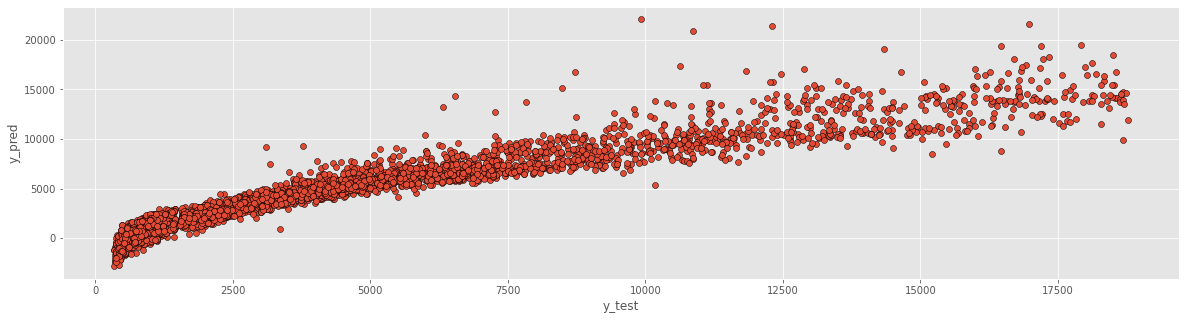

In [113]:
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, edgecolor='black')
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
print(r2_score(y_test,y_pred)) #R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(np.math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9049785580890433
1571771.801404221
1253.7032349819558


In [116]:
print(r2_score(y_train,model.predict(X_train)))

0.9086135512534983


In [117]:
model.score(X_train,y_train) 

0.9086135512534983

In [118]:
model.score(X_test,y_test) 

0.9049785580890433

In [119]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 872.3186973812143
MSE: 1571771.801404221
RMSE: 1253.7032349819558


In [120]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clr=LinearRegression()
cross_val_score(clr,X,y,cv=4)
cross_val_score(clr,X,y,cv=4).mean()

0.9078004034832114

In [121]:
LR_score=cross_val_score(clr,X,y,cv=4).mean()

# KNN Regression

In [122]:
X=df.drop('price',axis=1)
y=df.price

In [124]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [125]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [126]:
y_pred = model.predict(X_test)

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 505.4788472964943
MSE: 828903.9893048129
RMSE: 910.4416451946895


In [128]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.9500566645013553
0.9644130513805755


In [129]:
"""K-FOLD CROSSVALIDATION"""
clr=KNeighborsRegressor()
print(cross_val_score(clr,X,y,cv=4))
print(cross_val_score(clr,X,y,cv=4).mean())

[0.94420418 0.94644006 0.94733504 0.94785705]
0.9464590823898021


## Tuning

In [130]:
scores = []
for i in range(1,30):
    clf3 = KNeighborsRegressor(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal K')

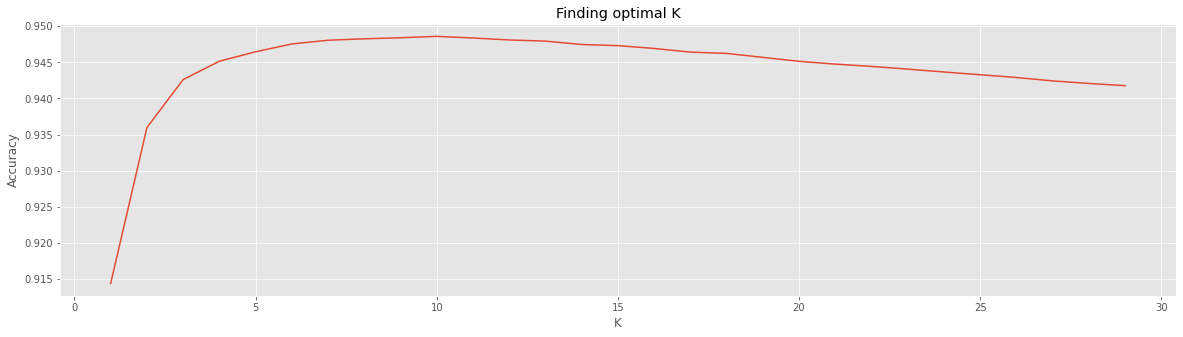

In [131]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [132]:
max(scores)

0.9485943150276139

In [133]:
scores.index(max(scores))

9

In [134]:
model = KNeighborsRegressor(n_neighbors=6)

In [135]:
#training
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [136]:
y_pred = model.predict(X_test)

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 504.8332095464449
MSE: 826325.3536550142
RMSE: 909.0243966225627


In [138]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.9502120331170796
0.9621440468678794


In [139]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.9501453726437166


In [140]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clr=KNeighborsRegressor(n_neighbors=6)
print(cross_val_score(clr,X,y,cv=4))
print(cross_val_score(clr,X,y,cv=4).mean())

[0.94578657 0.94761525 0.94849203 0.94827636]
0.9475425520245268


In [141]:
KNN_score=cross_val_score(clr,X,y,cv=4).mean()

# SVM

In [142]:
from sklearn.svm import SVR

In [143]:
"""K-FOLD CROSSVALIDATION"""

csvr=SVR(kernel='linear')
print(cross_val_score(csvr,X,y,cv=4))
print(cross_val_score(csvr,X,y,cv=4).mean())

[0.79795585 0.79242403 0.79413093 0.79156148]
0.7940180705373552


## Tuning

### GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid={
                        #'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf'],
                        #'degree': [2,3],
                        #'gamma' : [0.1,0.2,1,10]
                    }
model61=GridSearchCV(SVR(),param_grid,cv=3)
model61.fit(X,y)
model61.best_params_

{'kernel': 'linear'}

In [146]:
param_grid={
                        #'C' : [0.1, 1, 10],
                        'kernel': ['linear'],
                        #'degree': [2,3],
                        'gamma' : [0.1,0.2,1,2]
                    }
model61=GridSearchCV(SVR(),param_grid,cv=3)
model61.fit(X,y)
model61.best_params_

{'gamma': 0.1, 'kernel': 'linear'}

In [147]:
model61.cv_results_ 

{'mean_fit_time': array([15.14395014, 15.24956338, 15.06887412, 15.01438642]),
 'std_fit_time': array([0.12110408, 0.07913423, 0.17104187, 0.08037638]),
 'mean_score_time': array([5.13086096, 5.04418651, 5.05664444, 4.97039739]),
 'std_score_time': array([0.04721972, 0.08278513, 0.07638016, 0.12860207]),
 'param_gamma': masked_array(data=[0.1, 0.2, 1, 2],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.1, 'kernel': 'linear'},
  {'gamma': 0.2, 'kernel': 'linear'},
  {'gamma': 1, 'kernel': 'linear'},
  {'gamma': 2, 'kernel': 'linear'}],
 'split0_test_score': array([0.79367224, 0.79367224, 0.79367224, 0.79367224]),
 'split1_test_score': array([0.78627551, 0.78627551, 0.78627551, 0.78627551]),
 'split2_test_score': array([0.79044287, 0.790

In [148]:
model = model61.best_estimator_

In [149]:
#training
model.fit(X_train,y_train)

SVR(gamma=0.1, kernel='linear')

In [150]:
y_pred = model.predict(X_test)

In [151]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1073.0074783079897
MSE: 3478339.6312422785
RMSE: 1865.0307319833307


In [152]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.7904221895142993
0.7914954540911632


In [153]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.7901415884589034


In [154]:
"""K-FOLD CROSSVALIDATION"""
svr=SVR(kernel='linear',gamma=.1)
print(cross_val_score(svr,X,y,cv=4))
print(cross_val_score(svr,X,y,cv=4).mean())

[0.79795585 0.79242403 0.79413093 0.79156148]
0.7940180705373552


In [155]:
SVM_score=cross_val_score(svr,X,y,cv=4).mean()

# Ensemble

# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
RF=RandomForestRegressor(max_depth=3,n_estimators=20,random_state=0)

In [158]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=0)

In [159]:
y_pred = RF.predict(X_test)

In [160]:
# Ealuation
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 722.2978089026378
MSE: 1617753.537819636
RMSE: 1271.9094062941888


In [161]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,RF.predict(X_train)))

0.9025266994296798
0.8998827184142086


In [162]:
"""K-FOLD CROSSVALIDATION"""
rfr=RandomForestRegressor(max_depth=3,n_estimators=20,random_state=0)
print(cross_val_score(rfr,X,y,cv=4))
print(cross_val_score(rfr,X,y,cv=4).mean())

[0.89738944 0.89672451 0.90334261 0.89479749]
0.898063512193984


## Tuning

In [163]:
scores = []
for i in range(1,20):
    dt = RandomForestRegressor(max_depth=i,n_estimators=20,random_state=0)
    scores.append(cross_val_score(dt,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal max_depth')

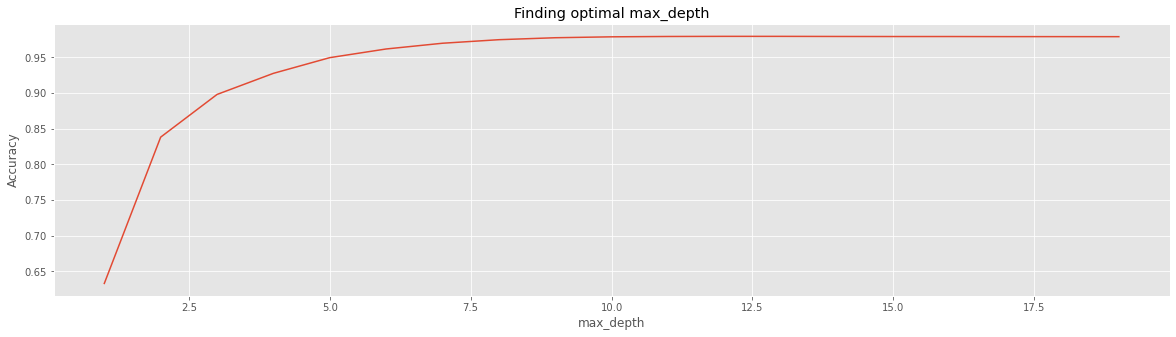

In [164]:
plt.plot(range(1,20),scores)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")

In [165]:
max(scores)

0.9795193063962311

In [166]:
scores.index(max(scores))

11

In [167]:
param_grid={'n_estimators':range(10,110,10),'max_depth':[5],'min_samples_split':[3,5],
          #  "criterion":["mse", "mae"] #DEFAULT= IS MSE
           }


In [168]:
clf=GridSearchCV(RandomForestRegressor(random_state=0),param_grid,cv=5)
clf.fit(X,y)
clf.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

In [169]:
RF=clf.best_estimator_

In [170]:
#training
model.fit(X_train,y_train)

SVR(gamma=0.1, kernel='linear')

In [171]:
y_pred = model.predict(X_test)

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1073.0074783079897
MSE: 3478339.6312422785
RMSE: 1865.0307319833307


In [173]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.7904221895142993
0.7914954540911632


In [174]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.7901415884589034


In [175]:
"""K-FOLD CROSSVALIDATION"""
rfr=clf.best_estimator_
print(cross_val_score(rfr,X,y,cv=4))
print(cross_val_score(rfr,X,y,cv=4).mean())

[0.95360203 0.94818806 0.95168926 0.94898952]
0.9506172163894069


In [176]:
RF_score=cross_val_score(rfr,X,y,cv=4).mean()

# Adaboost

In [177]:
from sklearn.ensemble import AdaBoostRegressor

In [178]:
model= AdaBoostRegressor(random_state=0)

In [179]:
model.fit(X_train,y_train)

AdaBoostRegressor(random_state=0)

In [180]:
y_pred = model.predict(X_test)

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 890.9344842151755
MSE: 1348031.051104242
RMSE: 1161.0473939957153


In [182]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.9187780877923457
0.9153355464602971


## Tuning

In [183]:
from sklearn.tree import DecisionTreeRegressor
param_grid={'n_estimators':range(10,110,10) , }
clf=GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=5)),param_grid)
clf.fit(X,y)
clf.best_params_

{'n_estimators': 30}

In [184]:
model= AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=20,random_state=0)

In [185]:
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  n_estimators=20, random_state=0)

In [186]:
y_pred = model.predict(X_test)

In [187]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 464.90100534600015
MSE: 558345.2664047085
RMSE: 747.2250440159969


In [188]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))

0.9663584379808358
0.9671536167158261


In [189]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))

Adjusted_R2=  0.9663133957228511


In [190]:
"""K-FOLD CROSSVALIDATION"""
adab= AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=30,random_state=0)
print(cross_val_score(adab,X,y,cv=4))
print(cross_val_score(adab,X,y,cv=4).mean())

[0.96662328 0.96611721 0.96788879 0.96650487]
0.9667835350373484


In [191]:
ADA_score=cross_val_score(adab,X,y,cv=4).mean()

# Model Comparison

Text(0.5, 1.0, 'Model Comparison on Score')

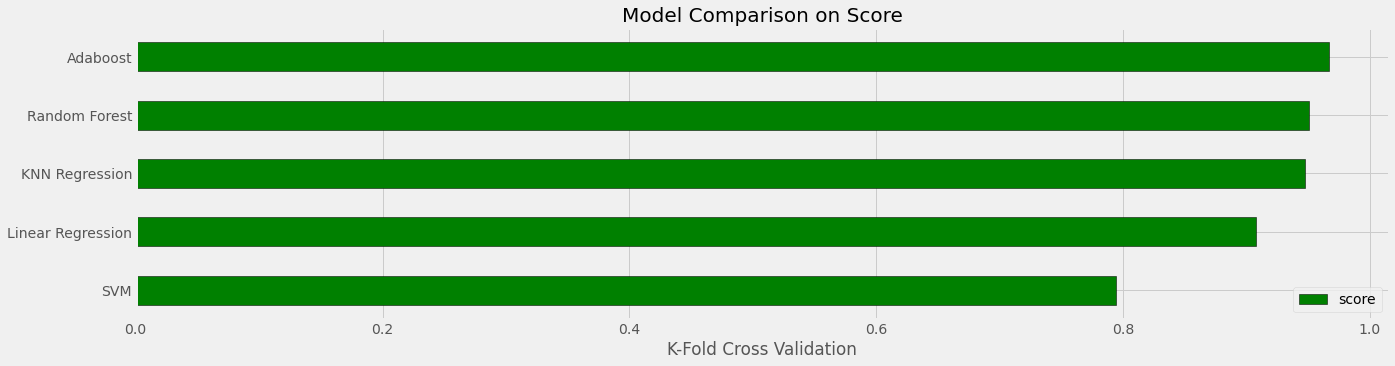

In [192]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','KNN Regression',
                                           'SVM','Random Forest','Adaboost'],
                                 'score': [LR_score,KNN_score,SVM_score,RF_score,ADA_score
                                          ]})

# Horizontal bar chart 
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20)